# Files

We will discuss three methods to accessing data from files. They are order from more flexible, but harder to use, to more specialized, but easier to use:
1. python `file` objects: can read **any kind of file**, but extracting information is a lot of work.
2. `csv` module: assumes information  is  stored in lines, with **comma separated fields**. Each line can contain different information that we must interpreted within the code.
3. `panda` module: assume files contain **tables** of data (each row has the same number of data fields). Easiest to use, but most restricted in what kind of files it can read.


For the rest of the semester we will use mostly `pandas`, but knowing about the other methods can be useful sometimes.

## Preliminaries

In [1]:
import os

### Data Directories

In [2]:
%pwd

'/home/manel/E4500DS/lectures/01_Introduction'

In [3]:
raw_dir="../../raw/yfinance"

In [4]:
data_dir="../../data/yfinance"
if not(os.path.exists(data_dir)):
    os.mkdir(data_dir)

## Reading Files

The [open](https://docs.python.org/3/library/functions.html#open) built in function returns a `file` object
           

In [5]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

we need a **file name** pointing to where the data is stored

In [6]:
filename=f"{raw_dir}/options_MSFT_2021-08-30.csv"
filename

'../../raw/yfinance/options_MSFT_2021-08-30.csv'

In [8]:
file=open(filename,"r")
file

<_io.TextIOWrapper name='../../raw/yfinance/options_MSFT_2021-08-30.csv' mode='r' encoding='UTF-8'>

We can not use a `for` loop to read all the lines in the file

In [9]:
lines=file.readlines()

Once we are done with the file we need to close it so that other applications can use it.

In [10]:
file.close()

We can see the number of lines

In [11]:
len(lines)

1887

In [12]:
lines[:10] # the first 10 lines

['contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,Type,Spot\n',
 'MSFT210903C00170000,2021-08-30 19:59:40,170.0,133.55,132.95,133.65,-0.44999695,-0.33581862,3.0,13.0,2.0859422851562495,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n',
 'MSFT210903C00175000,2021-08-30 13:39:02,175.0,128.45,127.95,128.65,-0.30000305,-0.2330121,4.0,30.0,1.984375078125,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n',
 'MSFT210903C00180000,2021-08-30 13:33:02,180.0,121.6,122.9,123.65,10.299995,9.254263,8.0,8.0,1.890625546875,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n',
 'MSFT210903C00185000,2021-08-20 14:43:42,185.0,120.35,118.1,119.1,0.0,0.0,1.0,29.0,1.5312523437499999,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n',
 'MSFT210903C00190000,2021-08-20 15:21:11,190.0,113.65,112.9,114.1,0.0,0.0,18.0,72.0,2.263676215820312,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n',
 'MS

Each line is a string 

In [13]:
type(lines[0])

str

In [14]:
lines[0]

'contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,Type,Spot\n'

We can break each line into **fields** by splitting on the commas `,`

In [15]:
fields=lines[0].split(",")
fields

['contractSymbol',
 'lastTradeDate',
 'strike',
 'lastPrice',
 'bid',
 'ask',
 'change',
 'percentChange',
 'volume',
 'openInterest',
 'impliedVolatility',
 'inTheMoney',
 'contractSize',
 'currency',
 'Expiry',
 'Type',
 'Spot\n']

The first line is a set of column names.

For now,  we are  be interested in three columns `strike`, `Expiry`, `Type` and `impliedVolatility` 

In [20]:
# the id's give with position on the line each one of the fields of interest is at
strike_id=2
expiry_id=14
type_id=15
impliedVolatility_id=10
fields[strike_id],fields[expiry_id],fields[type_id],fields[impliedVolatility_id]

('strike', 'Expiry', 'Type', 'impliedVolatility')

The lines after the header contain the actual data

In [21]:
line1=lines[1]
line1

'MSFT210903C00170000,2021-08-30 19:59:40,170.0,133.55,132.95,133.65,-0.44999695,-0.33581862,3.0,13.0,2.0859422851562495,True,REGULAR,USD,2021-09-03,Call,303.5899963378906\n'

We split again by the commas

In [22]:
items=line1.split(",")
items

['MSFT210903C00170000',
 '2021-08-30 19:59:40',
 '170.0',
 '133.55',
 '132.95',
 '133.65',
 '-0.44999695',
 '-0.33581862',
 '3.0',
 '13.0',
 '2.0859422851562495',
 'True',
 'REGULAR',
 'USD',
 '2021-09-03',
 'Call',
 '303.5899963378906\n']

The fields of interest are

In [23]:
items[strike_id],items[expiry_id],items[type_id],items[impliedVolatility_id]

('170.0', '2021-09-03', 'Call', '2.0859422851562495')

We want `strike` and `impliedVolatility` to be floating numbers, and we will leave the `Expiry` (for now)  and the type as strings 

In [24]:
strike,expiry,type_,implied_vol=float(items[strike_id]),items[expiry_id],items[type_id],float(items[impliedVolatility_id])
strike,expiry,type_,implied_vol

(170.0, '2021-09-03', 'Call', 2.0859422851562495)

We are only interested in collecting options of type `Put` with expiry  `2021-12-17`

In [25]:
target_type="Put"
target_expiry="2021-12-17"

We can now colect all the useful data in to a set of python lists:
    

In [26]:
strikes=[]
expiries=[]
types=[]
volatilities=[]
for line in lines[1:]: # skip header
    items=line.split(",")
    strike=float(items[strike_id])
    expiry=items[expiry_id]
    type_=items[type_id]
    implied_vol=float(items[impliedVolatility_id])
    if (type_==target_type) and (expiry==target_expiry):
        strikes.append(strike)
        expiries.append(expiry)
        types.append(type_)
        volatilities.append(implied_vol)
    print(strike,expiry,type_,implied_vol)

170.0 2021-09-03 Call 2.0859422851562495
175.0 2021-09-03 Call 1.984375078125
180.0 2021-09-03 Call 1.890625546875
185.0 2021-09-03 Call 1.5312523437499999
190.0 2021-09-03 Call 2.263676215820312
195.0 2021-09-03 Call 2.1523483691406247
200.0 2021-09-03 Call 2.0449267626953125
205.0 2021-09-03 Call 1.21875390625
210.0 2021-09-03 Call 1.8359383203124997
215.0 2021-09-03 Call 1.734376328125
220.0 2021-09-03 Call 1.6337908935546874
225.0 2021-09-03 Call 1.5361351318359375
230.0 2021-09-03 Call 1.439455927734375
235.0 2021-09-03 Call 1.3447298388671873
240.0 2021-09-03 Call 1.272464575195312
245.0 2021-09-03 Call 0.8437515624999999
250.0 2021-09-03 Call 0.975586181640625
255.0 2021-09-03 Call 0.9936524072265626
260.0 2021-09-03 Call 0.9023447265625
265.0 2021-09-03 Call 0.7622094091796876
270.0 2021-09-03 Call 0.7348659326171875
272.5 2021-09-03 Call 0.6889679541015626
275.0 2021-09-03 Call 0.49414568359375005
277.5 2021-09-03 Call 0.45606012695312503
280.0 2021-09-03 Call 0.41699801757812

270.0 2021-12-17 Call 0.26081061462402344
275.0 2021-12-17 Call 0.2519911227416992
280.0 2021-12-17 Call 0.2425612854003906
285.0 2021-12-17 Call 0.23407748352050778
290.0 2021-12-17 Call 0.22754678710937498
295.0 2021-12-17 Call 0.2207414352416992
300.0 2021-12-17 Call 0.2156145333862305
310.0 2021-12-17 Call 0.20591004058837886
320.0 2021-12-17 Call 0.20032537963867186
330.0 2021-12-17 Call 0.19739572143554687
340.0 2021-12-17 Call 0.1978534805297852
350.0 2021-12-17 Call 0.20142400146484374
360.0 2021-12-17 Call 0.20789366333007808
370.0 2021-12-17 Call 0.2172929833984375
380.0 2021-12-17 Call 0.22864540893554688
390.0 2021-12-17 Call 0.23780059082031246
145.0 2021-12-17 Put 0.6196327099609377
150.0 2021-12-17 Put 0.6035195898437502
155.0 2021-12-17 Put 0.586918193359375
160.0 2021-12-17 Put 0.5708050732421875
165.0 2021-12-17 Put 0.5549360913085939
170.0 2021-12-17 Put 0.5385788330078126
175.0 2021-12-17 Put 0.523442265625
180.0 2021-12-17 Put 0.506840869140625
185.0 2021-12-17 Put

120.0 2023-01-20 Call 0.507817421875
125.0 2023-01-20 Call 0.5056812127685546
130.0 2023-01-20 Call 0.48590601989746096
135.0 2023-01-20 Call 0.4668632415771484
140.0 2023-01-20 Call 0.46362841064453125
145.0 2023-01-20 Call 0.4454401159667969
150.0 2023-01-20 Call 0.44116769775390624
155.0 2023-01-20 Call 0.42380336944580077
160.0 2023-01-20 Call 0.40698835205078127
165.0 2023-01-20 Call 0.40210558837890625
170.0 2023-01-20 Call 0.39649041015625003
175.0 2023-01-20 Call 0.3902648864746094
180.0 2023-01-20 Call 0.38352056915283206
185.0 2023-01-20 Call 0.37637952728271484
190.0 2023-01-20 Call 0.3435734588623046
195.0 2023-01-20 Call 0.3609988217163086
200.0 2023-01-20 Call 0.3528507098388671
205.0 2023-01-20 Call 0.34445845977783207
210.0 2023-01-20 Call 0.34241380249023434
215.0 2023-01-20 Call 0.33328913787841796
220.0 2023-01-20 Call 0.31796946685791017
225.0 2023-01-20 Call 0.30522850540161134
230.0 2023-01-20 Call 0.3004067762756348
235.0 2023-01-20 Call 0.31532972274780263
240.0

In [27]:
len(strikes),len(expiries),len(types),len(volatilities)

(32, 32, 32, 32)

In [28]:
strikes

[145.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 175.0,
 180.0,
 185.0,
 190.0,
 195.0,
 200.0,
 210.0,
 220.0,
 230.0,
 240.0,
 250.0,
 260.0,
 270.0,
 275.0,
 280.0,
 285.0,
 290.0,
 295.0,
 300.0,
 310.0,
 320.0,
 330.0,
 340.0,
 350.0,
 360.0,
 370.0]

In [29]:
volatilities

[0.6196327099609377,
 0.6035195898437502,
 0.586918193359375,
 0.5708050732421875,
 0.5549360913085939,
 0.5385788330078126,
 0.523442265625,
 0.506840869140625,
 0.495122236328125,
 0.47876497802734375,
 0.46289599609375004,
 0.44690494506835937,
 0.4151669812011719,
 0.385626260986328,
 0.35742830078125,
 0.3306951696777344,
 0.30475548767089844,
 0.2830882238769531,
 0.2630078582763672,
 0.2540052627563477,
 0.24539939178466796,
 0.2375564526367187,
 0.23084265258789063,
 0.22467816345214842,
 0.2194291925048828,
 0.2104571142578125,
 0.20609314422607417,
 0.20514710876464842,
 0.207741076965332,
 0.21643849975585935,
 0.22736368347167968,
 0.2395095581054687]

In [30]:
print("strike,volatility")
for i in range(len(strikes)): # loop over all strikes
    print(strikes[i],volatilities[i],sep=",") # print all using comma as separator

strike,volatility
145.0,0.6196327099609377
150.0,0.6035195898437502
155.0,0.586918193359375
160.0,0.5708050732421875
165.0,0.5549360913085939
170.0,0.5385788330078126
175.0,0.523442265625
180.0,0.506840869140625
185.0,0.495122236328125
190.0,0.47876497802734375
195.0,0.46289599609375004
200.0,0.44690494506835937
210.0,0.4151669812011719
220.0,0.385626260986328
230.0,0.35742830078125
240.0,0.3306951696777344
250.0,0.30475548767089844
260.0,0.2830882238769531
270.0,0.2630078582763672
275.0,0.2540052627563477
280.0,0.24539939178466796
285.0,0.2375564526367187
290.0,0.23084265258789063
295.0,0.22467816345214842
300.0,0.2194291925048828
310.0,0.2104571142578125
320.0,0.20609314422607417
330.0,0.20514710876464842
340.0,0.207741076965332
350.0,0.21643849975585935
360.0,0.22736368347167968
370.0,0.2395095581054687


## Writing Files

We can now save our cleaned up data to a new file in `data_dir`

In [41]:
filename=f"{data_dir}/sample_option_data.csv"
filename

'../../data/yfinance/sample_option_data.csv'

In [42]:
out_file=open(filename,"w") # open for writing

In [43]:
print("strike,volatility",file=out_file)
for i in range(len(strikes)): # loop over all strikes
    print(strikes[i],volatilities[i],sep=",") # by default print to the console
    print(strikes[i],volatilities[i],sep=",",file=out_file) # save to a file using comma as separator

145.0,0.6196327099609377
150.0,0.6035195898437502
155.0,0.586918193359375
160.0,0.5708050732421875
165.0,0.5549360913085939
170.0,0.5385788330078126
175.0,0.523442265625
180.0,0.506840869140625
185.0,0.495122236328125
190.0,0.47876497802734375
195.0,0.46289599609375004
200.0,0.44690494506835937
210.0,0.4151669812011719
220.0,0.385626260986328
230.0,0.35742830078125
240.0,0.3306951696777344
250.0,0.30475548767089844
260.0,0.2830882238769531
270.0,0.2630078582763672
275.0,0.2540052627563477
280.0,0.24539939178466796
285.0,0.2375564526367187
290.0,0.23084265258789063
295.0,0.22467816345214842
300.0,0.2194291925048828
310.0,0.2104571142578125
320.0,0.20609314422607417
330.0,0.20514710876464842
340.0,0.207741076965332
350.0,0.21643849975585935
360.0,0.22736368347167968
370.0,0.2395095581054687


In [44]:
out_file.close() # we need to remember to close

### With statement
It is easy to forget to close the file (and things may not save properly if you don't).
                                        
It is better to use a `with` statement that closes file automatically

In [45]:
with open(filename,"w") as out_file: # create file object
    print("strike,volatility",file=out_file) # do things with file
    for i in range(len(strikes)):
        print(strikes[i],volatilities[i],sep=",",file=out_file) 
# file closes automatically when we are done.

## python modules

We can import libraries of functions (also called modules) to perform specific tasks on the data.

For example, to plot the data we just read, we can use [matplotlib](https://matplotlib.org/)

In [46]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'volatility')

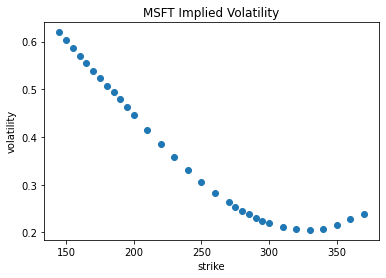

In [47]:
plt.scatter(strikes,volatilities)
plt.title("MSFT Implied Volatility")
plt.xlabel("strike")
plt.ylabel("volatility")

## CSV 

The [csv module](https://docs.python.org/3/library/csv.html) defines classes specialized in the   reading of comma separated files

In [49]:
import csv # part of the standard library

We want to read the same data as before

In [68]:
filename=f"{raw_dir}/options_MSFT_2021-08-30.csv"
filename

'../../raw/yfinance/options_MSFT_2021-08-30.csv'

We open the file

In [69]:
file=open(filename,"r")

In [70]:
reader=csv.reader(file)

`csv` splits the fields for us

In [71]:
columns=next(reader)
columns

['contractSymbol',
 'lastTradeDate',
 'strike',
 'lastPrice',
 'bid',
 'ask',
 'change',
 'percentChange',
 'volume',
 'openInterest',
 'impliedVolatility',
 'inTheMoney',
 'contractSize',
 'currency',
 'Expiry',
 'Type',
 'Spot']

and we can loop through the other lines, but we still need to refer to the times by position

In [72]:
count=0
for items in reader:
    print(items[strike_id],items[expiry_id],items[type_id],items[impliedVolatility_id])
    count+=1
    if count==10: # we only want the first 10 items
        break

170.0 2021-09-03 Call 2.0859422851562495
175.0 2021-09-03 Call 1.984375078125
180.0 2021-09-03 Call 1.890625546875
185.0 2021-09-03 Call 1.5312523437499999
190.0 2021-09-03 Call 2.263676215820312
195.0 2021-09-03 Call 2.1523483691406247
200.0 2021-09-03 Call 2.0449267626953125
205.0 2021-09-03 Call 1.21875390625
210.0 2021-09-03 Call 1.8359383203124997
215.0 2021-09-03 Call 1.734376328125


In [73]:
file.close()

As a conveninience `csv` has a [DictReader](https://docs.python.org/3/library/csv.html#csv.DictReader) class that allows to refer to fields by name.

In [74]:
with open(filename,"r") as file: # this makes sure the file closes
    count=0
    for items in csv.DictReader(file):
        print(items["strike"],items["Expiry"],items["Type"],items["impliedVolatility"])
        count=count+1
        if count>10:
            break

170.0 2021-09-03 Call 2.0859422851562495
175.0 2021-09-03 Call 1.984375078125
180.0 2021-09-03 Call 1.890625546875
185.0 2021-09-03 Call 1.5312523437499999
190.0 2021-09-03 Call 2.263676215820312
195.0 2021-09-03 Call 2.1523483691406247
200.0 2021-09-03 Call 2.0449267626953125
205.0 2021-09-03 Call 1.21875390625
210.0 2021-09-03 Call 1.8359383203124997
215.0 2021-09-03 Call 1.734376328125
220.0 2021-09-03 Call 1.6337908935546874


We are still getting the fields as strings, and we need to do all the transformations ourselves.

## Pandas

Pandas is a library that specializes in reading tabular data.

It is less flexible than `csv` or raw python, but makes reading the data much easier

In [75]:
import pandas as pd # a third party package

`pandas` has a function [read_csv](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html) that can read a csv file.

Note that the function `read_csv` has a lot of optional arguments because there are a lot of things you may want to do while reading a table.

In [76]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x7ffb70ad7470>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whit

But, if the format of the table is simple, reading data is very easy.

In [77]:
data=pd.read_csv(filename)
data.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,Type,Spot
0,MSFT210903C00170000,2021-08-30 19:59:40,170.0,133.55,132.95,133.65,-0.449997,-0.335819,3.0,13.0,2.085942,True,REGULAR,USD,2021-09-03,Call,303.589996
1,MSFT210903C00175000,2021-08-30 13:39:02,175.0,128.45,127.95,128.65,-0.300003,-0.233012,4.0,30.0,1.984375,True,REGULAR,USD,2021-09-03,Call,303.589996
2,MSFT210903C00180000,2021-08-30 13:33:02,180.0,121.60,122.90,123.65,10.299995,9.254263,8.0,8.0,1.890626,True,REGULAR,USD,2021-09-03,Call,303.589996
3,MSFT210903C00185000,2021-08-20 14:43:42,185.0,120.35,118.10,119.10,0.000000,0.000000,1.0,29.0,1.531252,True,REGULAR,USD,2021-09-03,Call,303.589996
4,MSFT210903C00190000,2021-08-20 15:21:11,190.0,113.65,112.90,114.10,0.000000,0.000000,18.0,72.0,2.263676,True,REGULAR,USD,2021-09-03,Call,303.589996


We can, for example restrict to only read  the  columns we care about

In [78]:
data=pd.read_csv(filename,usecols=["strike","Expiry","Type","impliedVolatility"])
data.head()

,strike,impliedVolatility,Expiry,Type
0,170.0,2.085942,2021-09-03,Call
1,175.0,1.984375,2021-09-03,Call
2,180.0,1.890626,2021-09-03,Call
3,185.0,1.531252,2021-09-03,Call
4,190.0,2.263676,2021-09-03,Call


`pandas` has figured out what columns are numbers and handled that for us

In [79]:
data.dtypes

strike               float64
impliedVolatility    float64
Expiry                object
Type                  object
dtype: object

There is a lot more to `pandas`, we will continue next week.

## Other file formats

There are many other file formats you can find data on. 

The most common are:

1. **Excel spreadsheet**: use `openpyxl` or `xlrd` python modules to read arbitrary data from Excel sheets. use `pandas.read_excel` to read a table of data.
2. **json**: use python's standard  library `json` module to read arbitrary json files. Use `pandas.read_json` to read a table.
3. **xml**: use python's standard  library `xml` module to read arbitrary xml files. Use `pandas.to_xml` to read a table. New on pandas 1.3, so it may not work if you have and older version of the library.
    
There are many other formats, only check if there is a `pandas.read_<format>` function first. 